This example is to illustrate how Naive Bayes can be used to 
classify emails as Spam and Non-Spam. The exercise is from the following URL: http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex6/ex6.html
Download the file and unzip/extract it. You should see four directories, namely, spam-train, spam-test, nonspam-train and nonspam-test. Our first task is to read this into lists......

In [15]:
#import the appropriate Naive Bayes class - MultinomialNB 
from sklearn.naive_bayes import MultinomialNB
import glob as glob

In [21]:
import numpy as np
from collections import Counter
import os
base_dir = "/Users/snerur/Dropbox/insy5378/ex6"

In [24]:
spam_train = []
spam_test = []
nospam_train = []
nospam_test = []

def populate(aList, dest):
    files = glob.glob(dest + "/*txt")
    for f in files:
        with open(f) as infile:
            aList.append(infile.read())

dest = os.path.join(base_dir,"spam-train")
populate(spam_train, dest)
populate(spam_test, base_dir + "/spam-test")
populate(nospam_train, base_dir + "/nonspam-train")
populate(nospam_test, base_dir + "/nonspam-test")
print(len(spam_train), len(spam_test), len(nospam_train), len(nospam_test))

350 130 350 130


In [25]:
X_train = spam_train + nospam_train
X_test = spam_test + nospam_test
y_train = list(np.ones(350)) + list(np.zeros(350))
y_test = list(np.ones(130)) + list(np.zeros(130))

In [57]:
#let us get the features for our training texts
from sklearn.feature_extraction.text import HashingVectorizer,\
                                            CountVectorizer
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(X_train)
#features will be a sparse matrix - you may convert it to a dense matrix
#features_dense = features.todense()

In [58]:
#let us now build our model and test it
model = MultinomialNB(alpha = 0.1) #ensure very rare words don't end up
                                    #with a probability of 0
model.fit(features_dense, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [59]:
test_features = vectorizer.transform(X_test)

In [60]:
predicted = model.predict(test_features)
predicted

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
#what is the accuracy of our prediction
import sklearn.metrics as metrics
print("Accuracy: ", metrics.accuracy_score(y_test, predicted))


Accuracy:  0.9769230769230769


In [54]:
#let us get some more metrics ....
probabilities = model.predict_proba(test_features) #we will need this
                                                   #for AUC/precision/recall
from sklearn.metrics import precision_recall_curve, auc, \
classification_report
print("\nClassification Report: ")
print(classification_report(y_test, predicted, \
                            target_names=['NO-SPAM', 'SPAM']))



Classification Report: 
              precision    recall  f1-score   support

     NO-SPAM       0.98      0.97      0.98       130
        SPAM       0.97      0.98      0.98       130

    accuracy                           0.98       260
   macro avg       0.98      0.98      0.98       260
weighted avg       0.98      0.98      0.98       260



In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted,\
                       labels =[1, 0] ))

[[128   2]
 [  4 126]]


In [35]:

precision, recall, prob_thresholds = \
           precision_recall_curve(y_test, probabilities[:, 1])

#area under the curve
area = auc(recall, precision)
print("\nArea Under Curve: %0.2f" % area)



Area Under Curve: 0.99


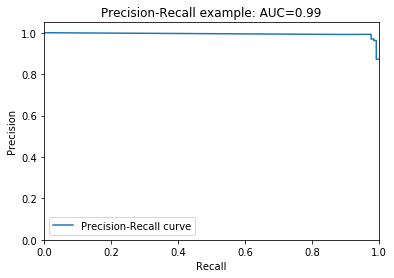

In [37]:
import matplotlib.pyplot as plt
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC=%0.2f' % area)
plt.legend(loc="lower left")

plt.show()

In [48]:
test_input = vectorizer.transform(["success guaranteed only few dollars"])
model.predict(test_input)

array([1.])

In [51]:
test_input = vectorizer.transform(["conference for information systems and telecom"])
model.predict(test_input)

array([0.])